In [1]:
import os
import numpy as np
import ipdb as pdb
from helper import *

In [2]:
def read_log(dir_path, user_idx=0, b=-1, e=-1):
    fileList = os.listdir(dir_path) #列出文件夹下所有的目录与文件
    fileList = [name for name in fileList if '.npz' in name]
    avg_rs = []
    avg_ps = []
    avg_bs = []
    avg_os = []

    if b == -1:
        b = 0
        e = len(fileList)
    elif e == -1:
        e = b+1
        
    for name in fileList[b:e]:
        path = dir_path + name
        res = np.load(path)

        temp_rs = np.array(res['arr_0'])
        avg_rs.append(temp_rs[:, user_idx])
        
        temp_ps = np.array(res['arr_1'])
        avg_ps.append(temp_ps[:, user_idx])
        
        temp_bs = np.array(res['arr_2'])
        avg_bs.append(temp_bs[:, user_idx])
        
        temp_os = np.array(res['arr_3'])
        avg_os.append(temp_os[:, user_idx])
    
    avg_rs = np.mean(avg_rs, axis=0, keepdims=True)
    avg_ps = np.mean(avg_ps, axis=0, keepdims=True)
    avg_bs = np.mean(avg_bs, axis=0, keepdims=True)
    avg_os = np.mean(avg_os, axis=0, keepdims=True)
    
    return avg_rs, avg_ps, avg_bs, avg_os, name

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float, axis=0)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
def plot_now(a1, a2, a11, a12, a21, a22, y_label, path):
    avg_a1 = moving_average(a1[0], win)
    avg_a2 = moving_average(a2[0], win)
    
    avg_a11 = moving_average(a11[0], win)
    avg_a12 = moving_average(a12[0], win)
    
    avg_a21 = moving_average(a21[0], win)
    avg_a22 = moving_average(a22[0], win)
    
    fig = plt.figure(figsize=(6, 4.5))
    # plt.plot(range(a1.shape[0]), a1)
    plt.plot(range(avg_a1.shape[0])[:-1:5], avg_a1[:-1:5], color='#1f77b4', label='DDPG, User 1')
    # plt.plot(range(a2.shape[0]), a2)
    plt.plot(range(avg_a2.shape[0])[:-1:5], avg_a2[:-1:5], color='#ff7f0e', label='DQN, User 1')
    
    plt.plot(range(avg_a11.shape[0])[:-1:5], avg_a11[:-1:5], color='#1f77b4', linestyle='-.', label='DDPG, User 2')
    plt.plot(range(avg_a12.shape[0])[:-1:5], avg_a12[:-1:5], color='#ff7f0e', linestyle='-.', label='DQN, User 2')
    
    plt.plot(range(avg_a21.shape[0])[:-1:5], avg_a21[:-1:5], color='#1f77b4', linestyle='--', label='DDPG, User 3')
    plt.plot(range(avg_a22.shape[0])[:-1:5], avg_a22[:-1:5], color='#ff7f0e', linestyle='--', label='DQN, Use 3')


    plt.grid(linestyle=':')
    plt.legend()
    plt.xlabel('Episode Index')
    plt.ylabel(y_label)
    plt.show()
    fig.savefig(path, format='eps', dpi=1000)

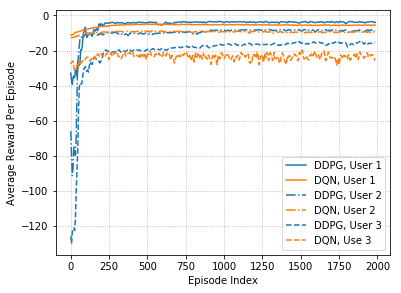

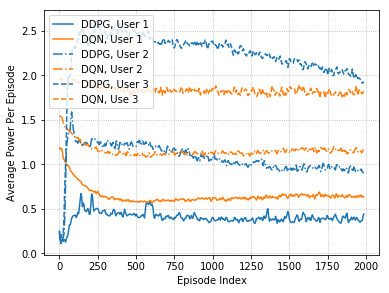

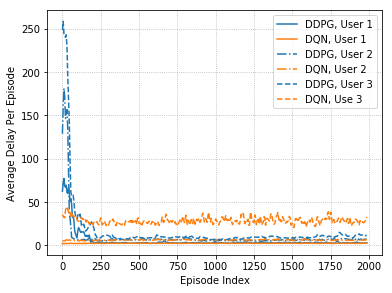

In [19]:
win = 10
a1,b1,c1,d1,name1 = read_log('t_M_05_nB/', user_idx=0, b=0, e=10)
a2,b2,c2,d2,name2 = read_log('t_M_05_nB_dqn/', user_idx=0, b=0, e=10)

a11,b11,c11,d11,name11 = read_log('t_M_05_nB/', user_idx=1, b=0, e=10)
a12,b12,c12,d12,name12 = read_log('t_M_05_nB_dqn/', user_idx=1, b=0, e=10)

a21,b21,c21,d21,name21 = read_log('t_M_05_nB/', user_idx=2, b=0, e=10)
a22,b22,c22,d22,name22 = read_log('t_M_05_nB_dqn/', user_idx=2, b=0, e=10)

plot_now(a1, a2, a11, a12, a21, a22, 'Average Reward Per Episode', 'figs/t_05_nB_reward.eps')
plot_now(b1, b2, b11, b12, b21, b22, 'Average Power Per Episode', 'figs/t_05_nB_power.eps')
plot_now(c1, c2, c11, c12, c21, c22, 'Average Delay Per Episode', 'figs/t_05_nB_delay.eps')

In [97]:
a,b,c,d,name = read_log('t_M_08_nB_dqn/', user_idx=0, b=10, e=20)
print a
print(np.mean(a), np.mean(b), np.mean(c))
# print(np.mean(b[:,1800:]), np.mean(c[:,1800:]))
# plot_curve(a,b,c,d)
# plot_curve(a[:,500:],b[:,500:],c[:,500:],d[:,500:])

[[-5.3106395  -5.29800987 -5.31413467 -5.31923634 -5.29461377 -5.3000488
  -5.29229206 -5.2895831  -5.32081601 -5.30196485 -5.26867865 -5.28869832
  -5.32023125 -5.34119608 -5.28968591 -5.31024902 -5.29589915 -5.28632626
  -5.2812368  -5.29533567 -5.32654764 -5.2893213  -5.30696086 -5.32776307
  -5.32997906 -5.33545633 -5.30600757 -5.30325332 -5.31983993 -5.29162539
  -5.30007453 -5.31622052 -5.3358864  -5.29273526 -5.29515155 -5.33333345
  -5.29732594 -5.30435627 -5.28621866 -5.30278269 -5.27198914 -5.28085029
  -5.35046169 -5.30939778 -5.35884862 -5.29676851 -5.32098944 -5.30787558
  -5.31955613 -5.30282871 -5.32764805 -5.30625764 -5.32806784 -5.32255374
  -5.31586237 -5.32382619 -5.33277572 -5.3273267  -5.32031047 -5.31846742
  -5.28681626 -5.33304144 -5.35207478 -5.32797507 -5.2862893  -5.33558963
  -5.30732683 -5.29950259 -5.33390142 -5.29923228 -5.29254077 -5.31161898
  -5.2974258  -5.30586186 -5.33737048 -5.30530922 -5.30755651 -5.33828089
  -5.29135539 -5.34103429 -5.2916048  -

In [99]:
path = 't_M_08_nB_dqn/'
u_id = 2
a = [ read_log(path, user_idx=u_id, b=i)[0][0] for i in range(10,20)]
print np.mean(np.array(a), axis=1)
b = [ read_log(path, user_idx=u_id, b=i)[1][0] for i in range(10,20)]
print np.mean(np.array(b), axis=1)
c = [ read_log(path, user_idx=u_id, b=i)[2][0] for i in range(10,20)]
print np.mean(np.array(c), axis=1)

[-2827.24443344  -350.94826542   -60.08051004   -16.19155358
   -18.13502055   -98.01164489 -1640.48690246  -141.75079425
   -40.9047902    -64.80173951]
[0.05202194 1.13670168 1.76803002 1.64347242 1.95467576 1.98426664
 1.4676714  1.50828973 1.90008242 1.53841773]
[1.41341411e+04 1.70927131e+03 2.29667250e+02 1.52166079e+01
 9.83734277e+00 4.10687504e+02 8.14372757e+03 6.48422231e+02
 1.28517891e+02 2.62471738e+02]


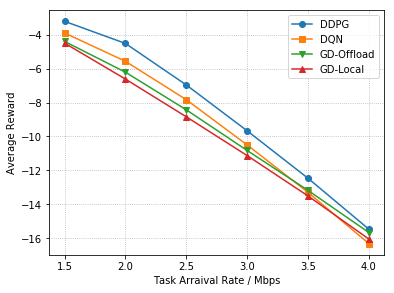

In [102]:
rate = np.linspace(1.5,4,6)
pg05 = [-3.2195,-4.522,-6.9655,-9.665,-12.459,-15.458]
qn05 = [-3.9055,-5.573,-7.833,-10.4985,-13.2885,-16.3085]
lgd = [-4.502,-6.6195,-8.8395,-11.1235,-13.499,-16.0385]
ogd = [-4.4025,-6.2145,-8.4295,-10.824,-13.173,-15.6555]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')

# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Reward')
plt.show()
fig.savefig('figs/t_05_nB_reward_test.eps', format='eps', dpi=1000)

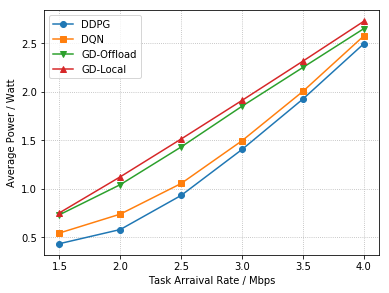

In [103]:
rate = np.linspace(1.5,4,6)
pg05 = [0.432,0.578,0.93,1.404,1.924,2.494]
qn05 = [0.542,0.737,1.053,1.494,2.003,2.575]
lgd = [0.75,1.122,1.512,1.91,2.315,2.726]
ogd = [0.73,1.041,1.43,1.85,2.25,2.65]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')

# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Power / Watt')
plt.show()
fig.savefig('figs/t_05_nB_power_test.eps', format='eps', dpi=1000)

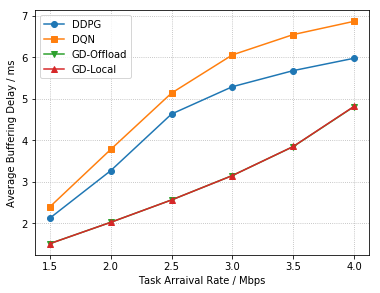

In [104]:
rate = np.linspace(1.5,4,6)
pg05 = [2.119,3.264,4.631,5.29,5.678,5.976]
qn05 = [2.391,3.776,5.136,6.057,6.547,6.867]
lgd = [1.504,2.019,2.559,3.147,3.848,4.817]
ogd = [1.505,2.019,2.559,3.148,3.846,4.811]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')
# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Buffering Delay / ms')
plt.show()
fig.savefig('figs/t_05_nB_delay_test.eps', format='eps', dpi=1000)

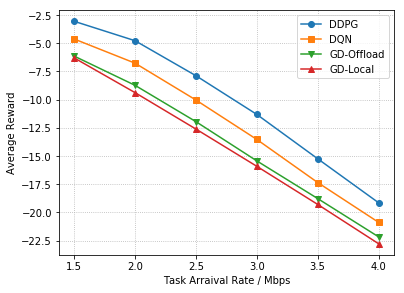

In [112]:
rate = np.linspace(1.5,4,6)
pg05 = [-3.0558,-4.7766,-7.8782,-11.3104,-15.24,-19.1388]
qn05 = [-4.6252,-6.768,-10.0342,-13.5286,-17.3482,-20.876]
lgd = [-6.3008,-9.3798,-12.6078,-15.9094,-19.2896,-22.7714]
ogd = [-6.141,-8.7318,-11.9518,-15.4296,-18.7692,-22.1622]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')

# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Reward')
plt.show()
fig.savefig('figs/t_08_nB_reward_test.eps', format='eps', dpi=1000)

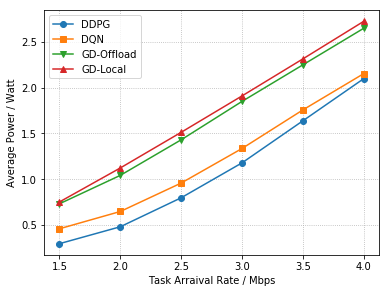

In [111]:
rate = np.linspace(1.5,4,6)
pg05 = [0.294,0.479,0.796,1.178,1.638,2.099]
qn05 = [0.457,0.646,0.957,1.335,1.757,2.154]
lgd = [0.75,1.122,1.512,1.91,2.315,2.726]
ogd = [0.73,1.041,1.43,1.85,2.25,2.65]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')

# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Power / Watt')
plt.show()
fig.savefig('figs/t_08_nB_power_test.eps', format='eps', dpi=1000)

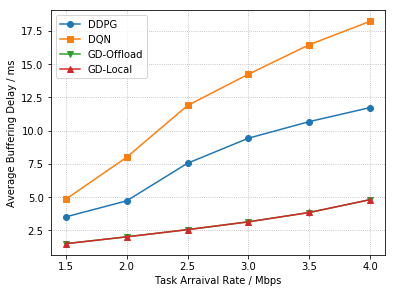

In [107]:
rate = np.linspace(1.5,4,6)
pg05 = [3.519,4.723,7.551,9.432,10.68,11.734]
qn05 = [4.846,8,11.891,14.243,16.461,18.22]
lgd = [1.504,2.019,2.559,3.147,3.848,4.817]
ogd = [1.505,2.019,2.559,3.148,3.846,4.811]
fig = plt.figure(figsize=(6, 4.5))
plt.plot(rate, pg05, marker='o', label='DDPG')
plt.plot(rate, qn05, marker='s',label='DQN')
plt.plot(rate, ogd, marker='v', label='GD-Offload')
plt.plot(rate, lgd, marker='^', label='GD-Local')
# marker='o', linestyle='dashed',
# ...      linewidth=2, markersize=12

plt.grid(linestyle=':')
plt.legend()
plt.xlabel('Task Arraival Rate / Mbps')
plt.ylabel('Average Buffering Delay / ms')
plt.show()
fig.savefig('figs/t_08_nB_delay_test.eps', format='eps', dpi=1000)